**texto en negrita**# DESAFIO 1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from google.colab import drive
drive.mount('/content/gdrive')
mpl.style.use('bmh')


Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**READ FILE CREDIT RECORD**


In [ ]:
# **Read File Credit_Record**
pd_credit_record_initial = pd.read_csv("/content/drive/MyDrive/Desafios- Curso Data Science -Comisión 29825/Desafio 2 Visualizaciones con Python/Tarjeta Credito/credit_record.csv")
pd_credit_record_initial.head()


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


## **_SIZE CREDIT CARD_**


In [ ]:
pd_credit_record_initial.shape


(1048575, 3)

## **_NULL ON DATA CREDIT CARD_**


In [ ]:
pd_credit_record_initial.isnull().sum()


ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

## **READ APPLICATION RECORD**


In [ ]:
# Read File Application
pd_application_record = pd.read_csv("/content/drive/MyDrive/Desafios- Curso Data Science -Comisión 29825/Desafio 2 Visualizaciones con Python/Tarjeta Credito/application_record.csv")
pd_application_record.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


## **_SIZE APPLICATION RECORD_**


In [ ]:
pd_application_record.shape


(438557, 18)

## **_NULL ON DATA APPLICATION RECORD_**


In [ ]:
pd_application_record.isnull().sum()


ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

## **_CLEAR DATA_**


In [ ]:
pd_credit_record = pd_credit_record_initial.drop_duplicates(subset=['ID'])
pd_application_record = pd_application_record.drop_duplicates(subset=['ID'])
print(pd_credit_record.shape)
print(pd_application_record.shape)


(45985, 3)
(438510, 18)


### MERGE RECORDS


In [ ]:
merge_record = pd.merge(pd_credit_record, pd_application_record, on=["ID"])
merge_record.sort_values("ID", inplace=True)
merge_record['DAYS_BIRTH'] = merge_record['DAYS_BIRTH']/-365
merge_record['DAYS_EMPLOYED'] = merge_record['DAYS_EMPLOYED']/-365
merge_record.head()


,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,NaN,2.0
1,5008805,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,NaN,2.0
2,5008806,0,C,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,Security staff,2.0
3,5008808,0,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1.0
4,5008809,-22,X,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1.0


---


# DESAFIO 2


## MATPLOTLIB


In [ ]:
merge_record["STATUS"].unique()


array(['C', '0', 'X', '1', '3', '5', '2', '4'], dtype=object)

#### NORMALIZE STATUS COLUMN

**BY THE CONTEXT OF DATA, ONLY VALUE "C" AND "X" FROM STATUS COLUMNS WILL APROVED WITH A CREDIT CARD**


In [ ]:
def status(s):
    if s == "C" or s == "X":
        return 0  # si aprueba tarjeta credito
    else:
        return 1  # no se aprueba tarjeta credito


merge_record['STATUS'] = merge_record['STATUS'].apply(lambda x: status(x))
# merge_record["STATUS"] = np.where((merge_record["STATUS"] == "C" OR  merge_record["STATUS"] == "X"), 0, 1)
merge_record = merge_record.astype({"CNT_FAM_MEMBERS": "int"})


## Graph CORRELATION MARITIAL STATUS VS APPROVED CREDIT CARD


In [ ]:
status_Family_Status_Join = pd.concat([merge_record["NAME_FAMILY_STATUS"], merge_record["STATUS"]],
                                      axis=1)
countRows = status_Family_Status_Join.shape[0]
status_Family_Status_Join.index = np.arange(countRows)

mapped = status_Family_Status_Join.groupby(
    ["NAME_FAMILY_STATUS", "STATUS"]).size().reset_index(name="COUNT")
mapped.head()


,NAME_FAMILY_STATUS,STATUS,COUNT
0,Civil marriage,0,2258
1,Civil marriage,1,687
2,Married,0,18988
3,Married,1,6060
4,Separated,0,1621


In [ ]:
#mapped.plot(x="NAME_FAMILY_STATUS", y=["STATUS", "COUNT"], kind="bar")
mappped_Pivoted = mapped.pivot(
    index="STATUS", columns="NAME_FAMILY_STATUS", values="COUNT")
mappped_Pivoted


NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Widow
STATUS,,,,,
0,2258,18988,1621,3616,1136
1,687,6060,482,1213,396


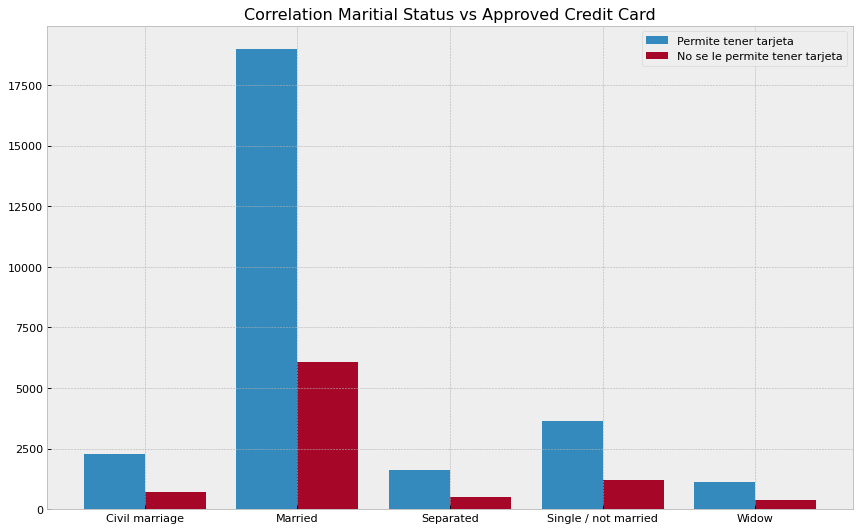

In [ ]:
status0 = []
status1 = []
columnsValues = mappped_Pivoted.columns.values
figure(figsize=(13, 8), dpi=80)

for valueSts in columnsValues:
    status0.append(mappped_Pivoted[valueSts][0])
    status1.append(mappped_Pivoted[valueSts][1])

x_axis = np.arange(len(columnsValues))

# Multi bar Chart

plt.bar(x_axis - 0.2, status0, width=0.4, label='Permite tener tarjeta')
plt.bar(x_axis + 0.2, status1, width=0.4,
        label='No se le permite tener tarjeta')

plt.xticks(x_axis, columnsValues)

# Add legend
plt.legend()

# Add title
plt.title("Correlation Maritial Status vs Approved Credit Card")

# Modify Font
plt.rcParams.update({'font.size': 3})

# Display
plt.show()


**Interpretación de los resultados**

De este gráfico es posible interpretar que existe una gran afluencia de las personas que están casadas y que desean poseer una tarjeta de crédito; pero además no es posible concluir que existe alguna tendencia respecto al estado cívil de las personas que indique que se le otorgará con mayor probabilidad su tarjeta de crédito.


### GRAPH EDUCATION


In [ ]:
record_approved = merge_record["STATUS"] == 0
merge_record_approved = merge_record[record_approved]
merge_record_approved


,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,NaN,2
1,5008805,0,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,NaN,2
2,5008806,0,0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,Security staff,2
4,5008809,-22,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1
5,5008810,0,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36451,5150481,0,0,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,29.610959,4.764384,1,0,0,0,Core staff,3
36452,5150482,-11,0,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,29.610959,4.764384,1,0,0,0,Core staff,3
36453,5150483,0,0,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,29.610959,4.764384,1,0,0,0,Core staff,3
36454,5150484,0,0,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,29.610959,4.764384,1,0,0,0,Core staff,3


In [ ]:
# Dataframe record_EDUCATION_TOTAL
pd_application_record_EDUCATION = merge_record.groupby(
    ["NAME_EDUCATION_TYPE"]).size().reset_index(name="COUNT")
pd_application_record_EDUCATION_percentage = pd_application_record_EDUCATION.assign(
    PERCETANGE=pd_application_record_EDUCATION[["COUNT"]] / len(merge_record)*100)
pd_application_record_EDUCATION_percentage


,NAME_EDUCATION_TYPE,COUNT,PERCETANGE
0,Academic degree,32,0.087775
1,Higher education,9864,27.056532
2,Incomplete higher,1410,3.867570
3,Lower secondary,374,1.025866
4,Secondary / secondary special,24777,67.962257


In [ ]:
# Dataframe record_EDUCATION_APPROVED
pd_application_record_EDUCATION_APPROVED = merge_record_approved.groupby(
    ["NAME_EDUCATION_TYPE"]).size().reset_index(name="COUNT")
pd_application_record_EDUCATION_APPROVED_percentage = pd_application_record_EDUCATION_APPROVED.assign(
    PERCETANGE=pd_application_record_EDUCATION_APPROVED[["COUNT"]] / len(merge_record_approved)*100)
pd_application_record_EDUCATION_APPROVED_percentage


,NAME_EDUCATION_TYPE,COUNT,PERCETANGE
0,Academic degree,28,0.101379
1,Higher education,7593,27.491944
2,Incomplete higher,1058,3.830696
3,Lower secondary,300,1.086209
4,Secondary / secondary special,18640,67.489772


<function matplotlib.pyplot.show>

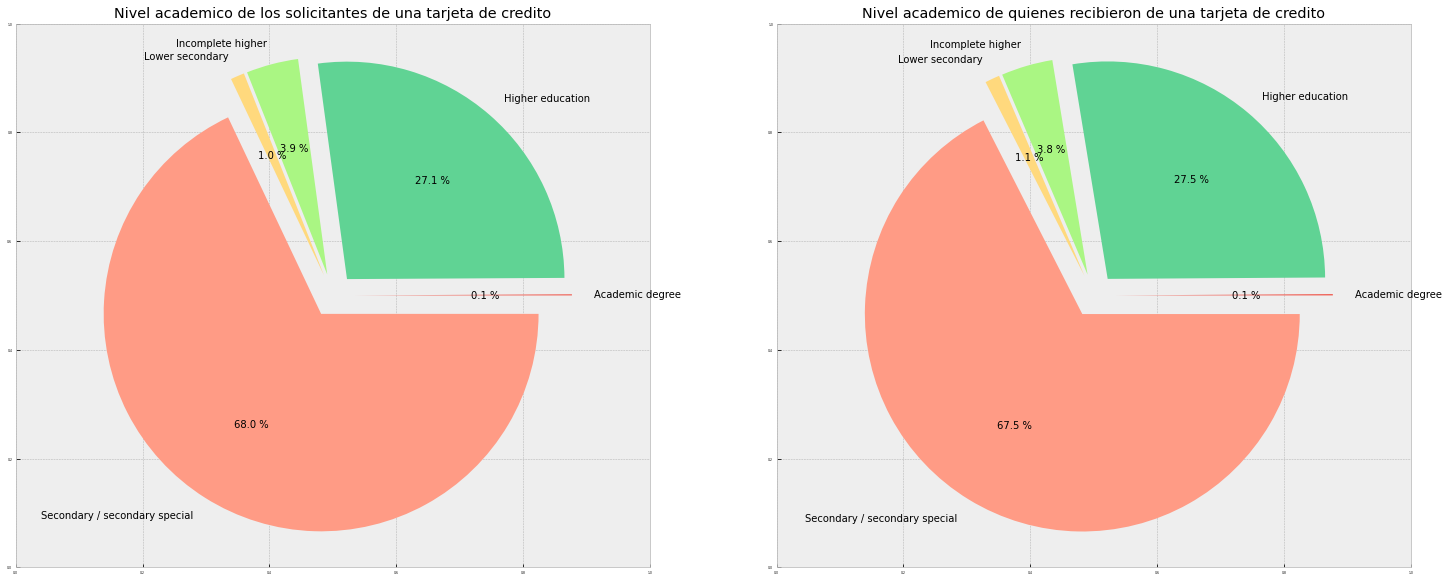

In [ ]:
# Modify Font
record_EDUCATION = pd_application_record_EDUCATION_percentage["NAME_EDUCATION_TYPE"]
record_EDUCATION_APPROVED = pd_application_record_EDUCATION_APPROVED_percentage[
    "NAME_EDUCATION_TYPE"]
percentage = pd_application_record_EDUCATION_percentage["PERCETANGE"]
percentage_APPROVED = pd_application_record_EDUCATION_APPROVED_percentage["PERCETANGE"]


# Graph record_EDUCATION
colores = ["#EE6055", "#60D394", "#AAF683", "#FFD97D", "#FF9B85"]
desfase = (0.1, 0.1, 0.1, 0.1, 0.1)
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
plt.rcParams.update({'font.size': 10})
ax = fig.add_subplot(121)
ax.pie(percentage, autopct="%0.1f %%", labels=record_EDUCATION,
       colors=colores, explode=desfase)
ax.set_title('Nivel academico de los solicitantes de una tarjeta de credito')
ax = fig.add_subplot(122)
ax.pie(percentage_APPROVED, autopct="%0.1f %%",
       labels=record_EDUCATION_APPROVED, colors=colores, explode=desfase)
ax.set_title('Nivel academico de quienes recibieron de una tarjeta de credito')
plt.show


**Interpretación de los resultados**

Con respecto al total de los solicitantes y de quienes recibieron una tarjeta de credito, se observa que mas de la mitad cuentan con la secundaria completa y mas de un cuarto cuenta con educaciòn superior culminada. Con lo cual mas del 95% cuentan nivel educativo alto o medio y no se observa incidencia del nivel educativo en el otorgamiento de dicha tarjeta. Dado que se mantiene las proporciones en ambas poblaciones.


### GRAPH: CURRENCY TREND


In [ ]:
status_Salary_Members_Family_Join = pd.concat([merge_record["AMT_INCOME_TOTAL"], merge_record["STATUS"], merge_record["CNT_FAM_MEMBERS"]],
                                              axis=1)
status_Salary_Members_Family_Join.head()


,AMT_INCOME_TOTAL,STATUS,CNT_FAM_MEMBERS
0,427500.0,0,2
1,427500.0,0,2
2,112500.0,0,2
3,270000.0,1,1
4,270000.0,0,1


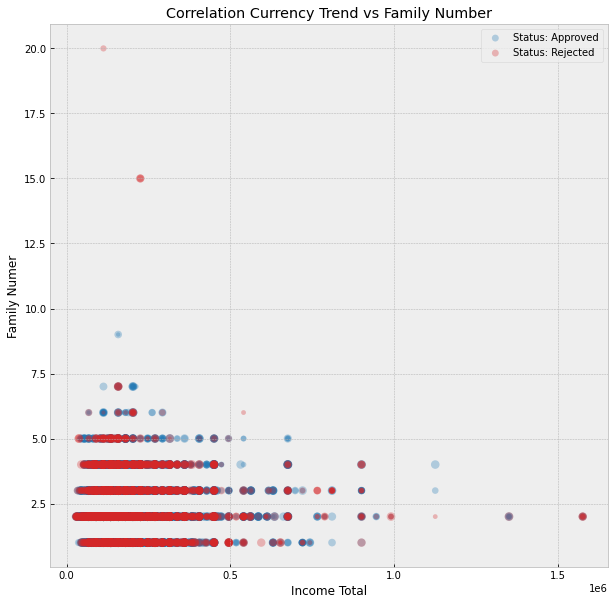

In [ ]:
# plt.style.use('_mpl-gallery')
# plot:
fig, ax = plt.subplots(figsize=(10, 10))

status_0_Salary_Members_Family_Join = status_Salary_Members_Family_Join.loc[
    status_Salary_Members_Family_Join['STATUS'] == 0]
status_1_Salary_Members_Family_Join = status_Salary_Members_Family_Join.loc[
    status_Salary_Members_Family_Join['STATUS'] == 1]

y0 = status_0_Salary_Members_Family_Join["CNT_FAM_MEMBERS"].values
x0 = status_0_Salary_Members_Family_Join["AMT_INCOME_TOTAL"].values

sizes = np.random.uniform(15, 80, len(x0))
ax.scatter(x0, y0, c='tab:blue', s=sizes, label='Status: Approved',
           alpha=0.3, edgecolors='none')


y1 = status_1_Salary_Members_Family_Join["CNT_FAM_MEMBERS"].values
x1 = status_1_Salary_Members_Family_Join["AMT_INCOME_TOTAL"].values

sizes = np.random.uniform(15, 80, len(x1))
ax.scatter(x1, y1, c='tab:red', s=sizes, label='Status: Rejected',
           alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)
# Add labels
plt.title("Correlation Currency Trend vs Family Number")
plt.xlabel("Income Total")
plt.ylabel("Family Numer")
# Modify Font
plt.rcParams.update({'font.size': 30})
plt.show()


**Interpretación de los resultados**

Respecto a la gráfica presentada, es posible concluir que la mayor cantidad de personas que solicitan una tarjeta de crédito tienen un salario anual máximo hasta los 500.000 USD. Además tampoco existe una relación directa entre los miembros familiares vs al salario. Solo se aprecia que dentro del rango especificado predomina el rechazo a la solicitud de tarjeta de crédito.


---


## SEABORN


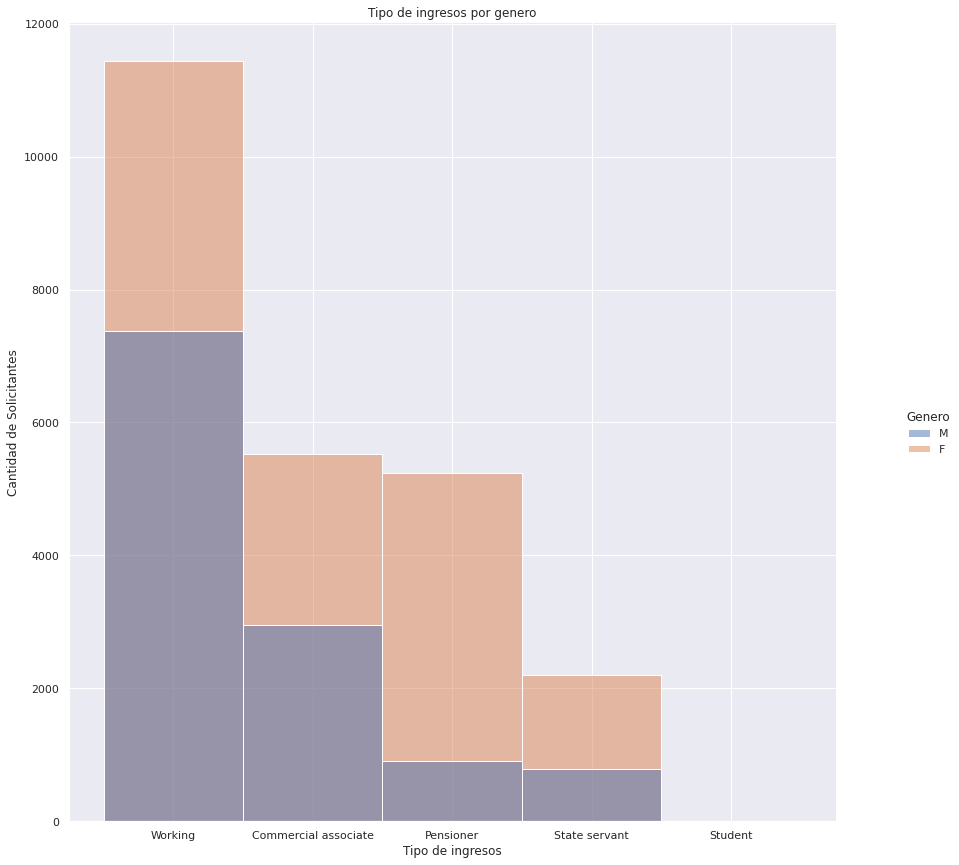

In [ ]:
# Graph INCOME_TYPE
sns.set(font_scale=1)
ax = sns.displot(data=merge_record, x="NAME_INCOME_TYPE",
                 hue="CODE_GENDER", height=12)
ax.set(xlabel='Tipo de ingresos', ylabel='Cantidad de Solicitantes',
       title="Tipo de ingresos por genero")
ax.legend.set_title("Genero")


**Interpretación de los resultados**

Con respecto al total de los solicitantes, se observa que la mayoría tiene sus ingresos empleos privados en condición de dependencia, teniendo una mayor incidencia en este grupo los hombres. EL segundo grupo corresponde a ingresos provenientes de negocios o inversiones, al igual que el caso anterior los hombres tiene mayor parcicipación. Finalmente, estan los pensionados y empleados publicos donde las mujeres tienen mayor incidencia.


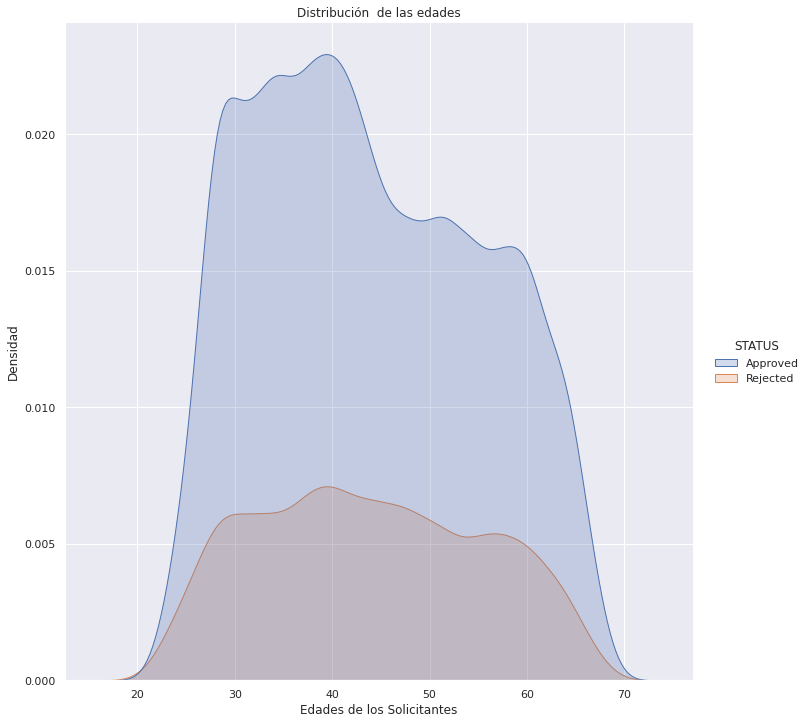

In [ ]:
# Graph Age DISTIBUTION
merge_record_change_value_status = merge_record.copy()
merge_record_change_value_status["STATUS"] = np.where(
    merge_record_change_value_status["STATUS"] == 0, "Approved", "Rejected")
ax = sns.displot(data=merge_record_change_value_status,
                 x='DAYS_BIRTH', kind='kde', hue='STATUS', fill=True, height=10)
ax.set(xlabel='Edades de los Solicitantes',
       ylabel='Densidad', title='Distribución  de las edades')


**Interpretación de los resultados**

Se observa que la mayoria de solicitantes y aprobados tiene edadaes entre 35 y 45 años. Tambien es claro que ambas distribuciones tiene un comportamiento similar con lo cual se concluye que la edad no es factor que tuvo impacto en las aprobaciones. Finalmente, otro dato de relevancia es que la mayor parte de solicitantes y aprobados tiene edades por debajo de 50 años.


### GRAPH HOUSING TYPE, OWN CAR AND STATUS


In [ ]:
ownCar_HousingType_merge = pd.concat([merge_record["FLAG_OWN_CAR"], merge_record["NAME_HOUSING_TYPE"],  merge_record["STATUS"]],
                                     axis=1)
ownCar_HousingType_merge["STATUS"] = np.where(
    ownCar_HousingType_merge["STATUS"] == 0, "Approved", "Rejected")
mapped = ownCar_HousingType_merge.groupby(
    ["FLAG_OWN_CAR", "NAME_HOUSING_TYPE", "STATUS"]).size().reset_index(name="COUNT")

mapped


,FLAG_OWN_CAR,NAME_HOUSING_TYPE,STATUS,COUNT
0,N,Co-op apartment,Approved,60
1,N,Co-op apartment,Rejected,13
2,N,House / apartment,Approved,15343
3,N,House / apartment,Rejected,4919
4,N,Municipal apartment,Approved,560
5,N,Municipal apartment,Rejected,205
6,N,Office apartment,Approved,98
7,N,Office apartment,Rejected,39
8,N,Rented apartment,Approved,268
9,N,Rented apartment,Rejected,84


Text(0.5, 0.98, 'Housing Type vs Count, Mapped to Status')

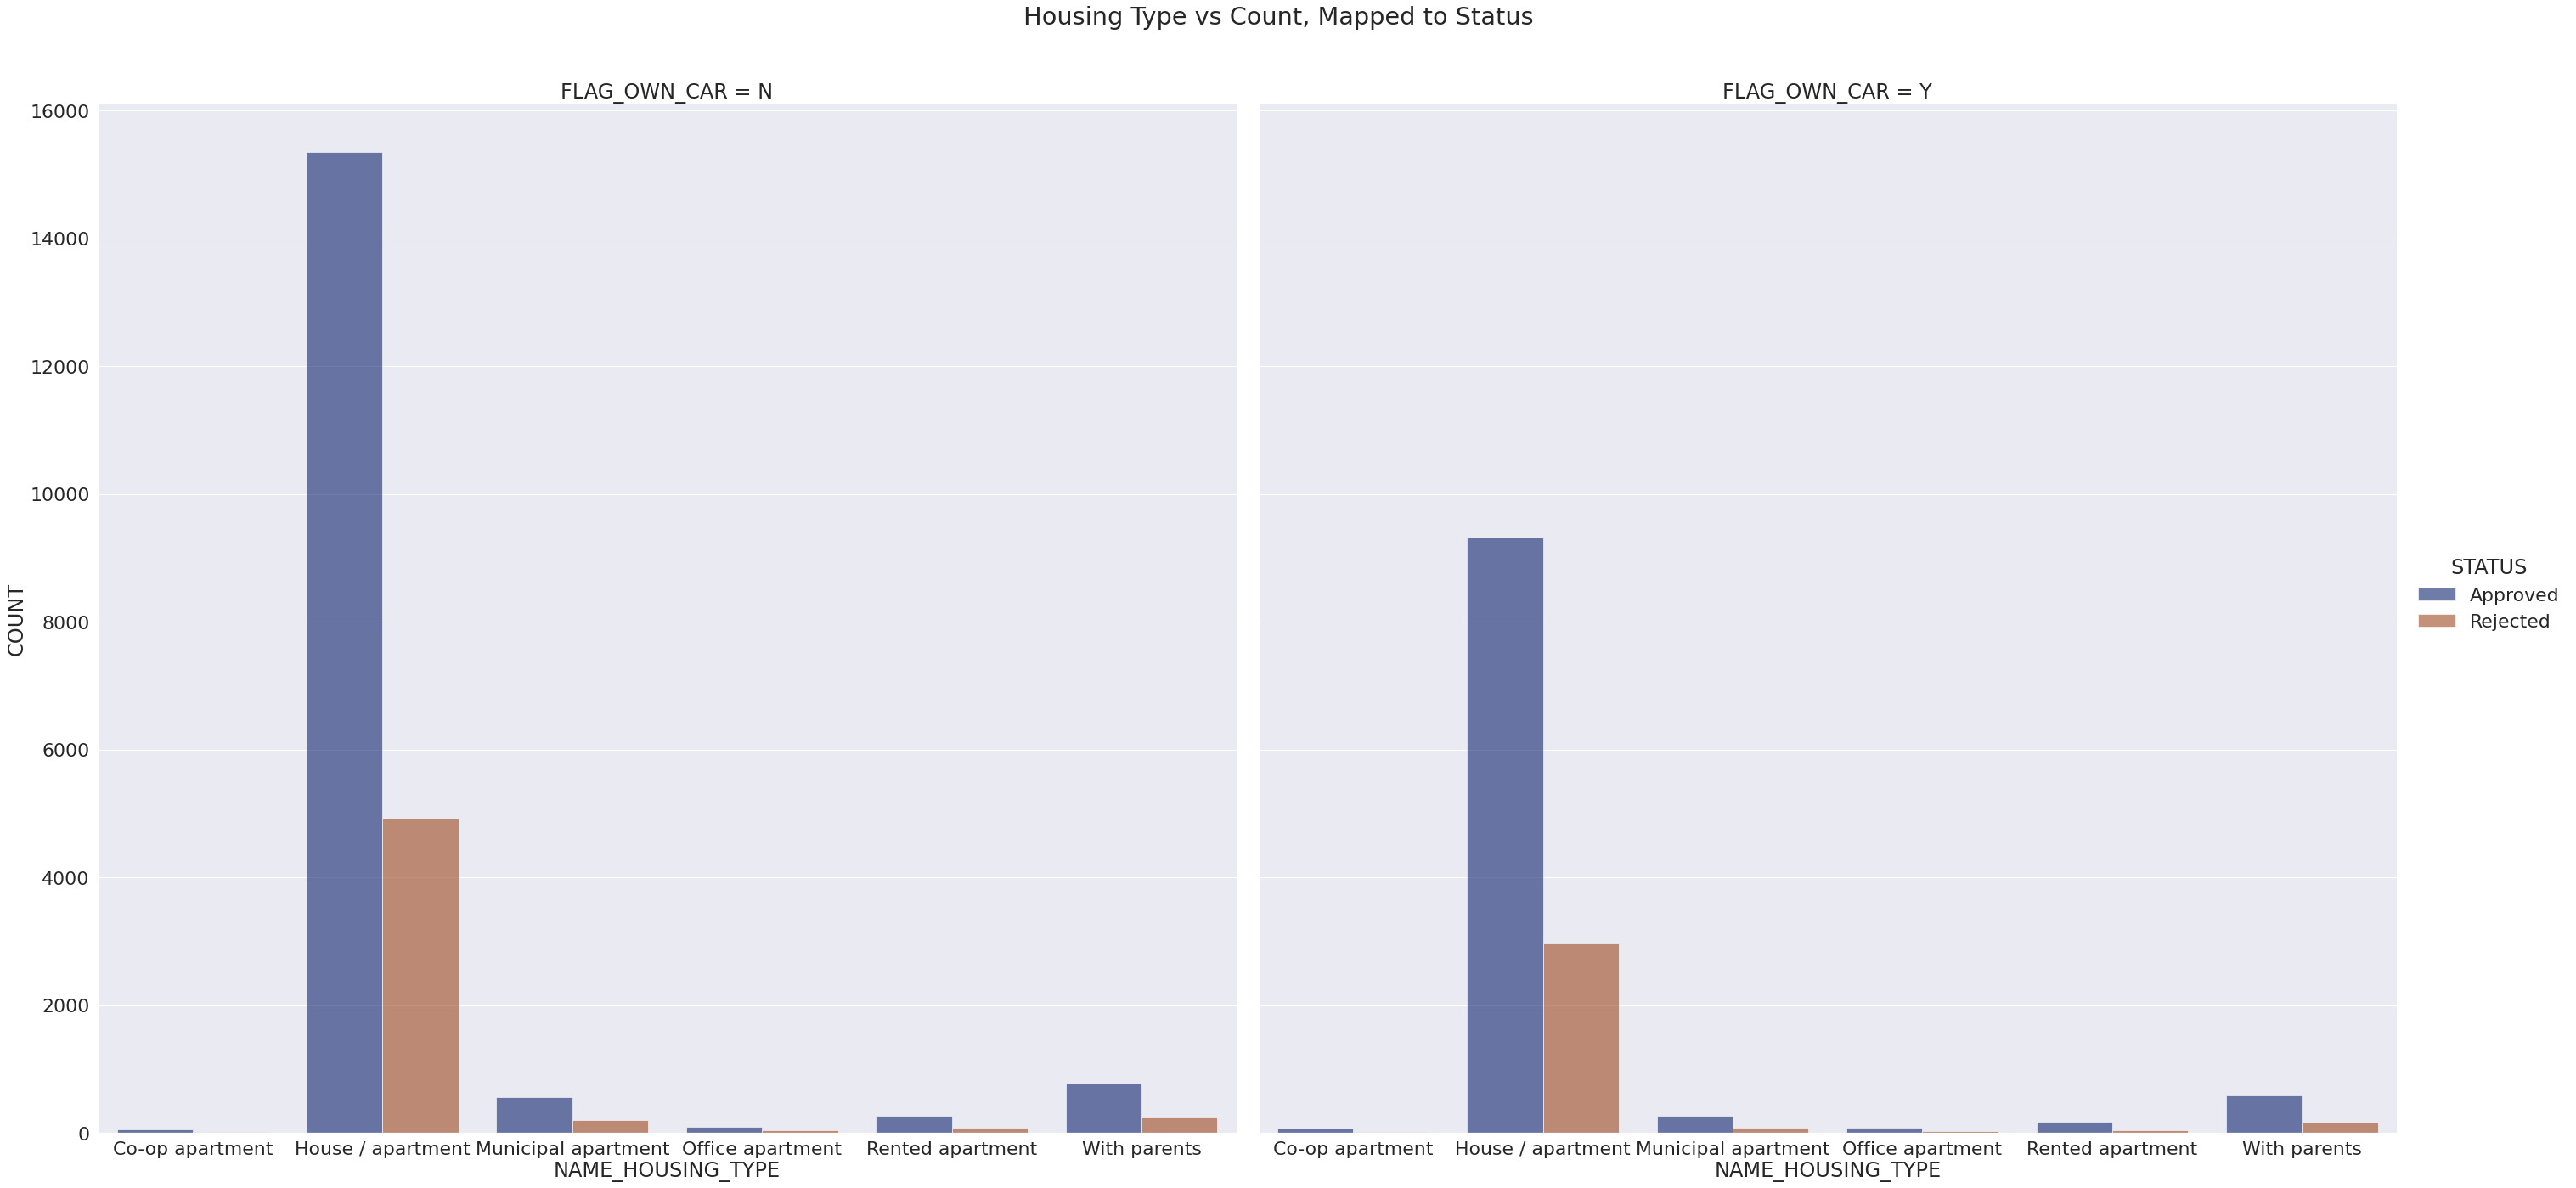

In [ ]:
sns.set(font_scale=2)
cp = sns.catplot(
    data=mapped, kind="bar",
    x="NAME_HOUSING_TYPE", y="COUNT", hue="STATUS", col="FLAG_OWN_CAR",
    ci="sd", palette="dark", alpha=.6, height=20
)
cp.fig.subplots_adjust(top=0.9)  # adjust the Figure in cp
cp.fig.suptitle('Housing Type vs Count, Mapped to Status')


**Interpretación de los resultados**

Para el análisis de la gráfica en donde se presentan dos escenarios: las personas que poseen o no un vehículo, y a la vez comparando si situación respecto al tipo de casa en que vive. La predominancia en ambas gráfica es para personas que poseen una casa o departamento. Además concluir que no existe una tendencia respecto a qué personas se le asigna una tarjeta o quienes no.


# DESAFIO 3


## Preguntas de interés o hipótesis


### 1 - ¿Cuál es el nivel de correlación entre las variales?


Se procede a borrar datos con lo que no se trabajará


In [ ]:
corr_merge_record = merge_record.copy()
corr_merge_record.drop(
    ["ID", "DAYS_BIRTH", "DAYS_EMPLOYED", "MONTHS_BALANCE"], axis=1, inplace=True)


In [ ]:
corr_merge_record.head()


,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2
1,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2
2,0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2
3,1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1
4,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1


### Normalizando


Se comenzarrá a verificar la correlación que existe entre las variables, para esto será necesario normalizar la información respecto a un valor número, con la idea que los valores categoricos, puedan ser numéricos.


In [ ]:
def changeNameEducation(e):
    if e == "Higher education":
        return 0
    elif e == "Secondary / secondary special":
        return 1
    elif e == 'Incomplete higher':
        return 2
    elif e == 'Lower secondary':
        return 3
    elif e == 'Academic degree':
        return 4
    else:
        return 5


def changeNameIncomeType(e):
    if e == "Working":
        return 0
    elif e == "Commercial associate":
        return 1
    elif e == 'Pensioner':
        return 2
    elif e == 'State servant':
        return 3
    else:
        return 4


def changFamilyStatus(e):
    if e == "Civil marriage":
        return 0
    elif e == "Married":
        return 1
    elif e == 'Single / not married':
        return 2
    elif e == 'Separated':
        return 3
    elif e == 'Widow':
        return 4
    else:
        return 5


def changHousingType(e):
    if e == "Rented apartment":
        return 0
    elif e == "House / apartment":
        return 1
    elif e == 'Municipal apartment':
        return 2
    elif e == 'With parents':
        return 3
    elif e == 'Co-op apartment':
        return 4
    elif e == 'Office apartment':
        return 5
    else:
        return 6


def changOccupationType(e):
    if e == "Security staff":
        return 0
    elif e == "Sales staff":
        return 1
    elif e == 'Accountants':
        return 2
    elif e == 'Laborers':
        return 3
    elif e == 'Managers':
        return 4
    elif e == 'Drivers':
        return 5
    elif e == 'Core staff':
        return 6
    elif e == 'High skill tech staff':
        return 7
    elif e == 'Cleaning staff':
        return 8
    elif e == 'Private service staff':
        return 9
    elif e == 'Cooking staff':
        return 10
    elif e == 'Low-skill Laborers':
        return 11
    elif e == 'Medicine staff':
        return 12
    elif e == 'Low-skill Laborer':
        return 13
    elif e == 'Secretaries':
        return 14
    elif e == 'Waiters/barmen staff':
        return 15
    elif e == 'HR staff':
        return 16
    elif e == 'Realty agents':
        return 17
    elif e == 'IT staff':
        return 18
    else:
        return 19


def changeCodeGender(dataIn):
    if dataIn == "F":
        return 0
    elif dataIn == "M":
        return 1


def changeOwnCar(dataIn):
    if dataIn == "Y":
        return 0
    elif dataIn == "N":
        return 1


def changeOwnRealty(dataIn):
    if dataIn == "Y":
        return 0
    elif dataIn == "N":
        return 1


In [ ]:
corr_merge_record['NAME_EDUCATION_TYPE'] = corr_merge_record['NAME_EDUCATION_TYPE'].apply(
    lambda x: changeNameEducation(x))
corr_merge_record["NAME_EDUCATION_TYPE"].unique()


array([0, 1, 2, 3, 4])

In [ ]:
corr_merge_record['NAME_INCOME_TYPE'] = corr_merge_record['NAME_INCOME_TYPE'].apply(
    lambda x: changeNameIncomeType(x))
corr_merge_record["NAME_INCOME_TYPE"].unique()


array([0, 1, 2, 3, 4])

In [ ]:
corr_merge_record['NAME_FAMILY_STATUS'] = corr_merge_record['NAME_FAMILY_STATUS'].apply(
    lambda x: changFamilyStatus(x))
corr_merge_record["NAME_FAMILY_STATUS"].unique()


array([0, 1, 2, 3, 4])

In [ ]:
corr_merge_record['NAME_HOUSING_TYPE'] = corr_merge_record['NAME_HOUSING_TYPE'].apply(
    lambda x: changHousingType(x))
corr_merge_record["NAME_HOUSING_TYPE"].unique()


array([0, 1, 2, 3, 4, 5])

In [ ]:
corr_merge_record['OCCUPATION_TYPE'] = corr_merge_record['OCCUPATION_TYPE'].apply(
    lambda x: changOccupationType(x))
corr_merge_record["OCCUPATION_TYPE"].unique()


array([19,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16,
       17, 18])

In [ ]:
corr_merge_record['CODE_GENDER'] = corr_merge_record['CODE_GENDER'].apply(
    lambda x: changeCodeGender(x))
corr_merge_record["CODE_GENDER"].unique()


array([1, 0])

In [ ]:
corr_merge_record['FLAG_OWN_CAR'] = corr_merge_record['FLAG_OWN_CAR'].apply(
    lambda x: changeOwnCar(x))
corr_merge_record["FLAG_OWN_CAR"].unique()


array([0, 1])

In [ ]:
corr_merge_record['FLAG_OWN_REALTY'] = corr_merge_record['FLAG_OWN_REALTY'].apply(
    lambda x: changeOwnRealty(x))
corr_merge_record["FLAG_OWN_REALTY"].unique()


array([0, 1])

In [ ]:
corr_merge_record.head()


,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,1,0,0,0,427500.0,0,0,0,0,1,1,0,0,19,2
1,0,1,0,0,0,427500.0,0,0,0,0,1,1,0,0,19,2
2,0,1,0,0,0,112500.0,0,1,1,1,1,0,0,0,0,2
3,1,0,1,0,0,270000.0,1,1,2,1,1,0,1,1,1,1
4,0,0,1,0,0,270000.0,1,1,2,1,1,0,1,1,1,1


In [ ]:
# corr_merge_record.corr()["STATUS"]


| Pearson’s r Value | Correlation Between x and y          |
| ----------------- | ------------------------------------ |
| equal to 1        | perfect positive linear relationship |
| greater than 0    | positive correlation                 |
| equal to 0        | no linear relationship               |
| less than 0       | negative correlation                 |
| equal to -1       | perfect negative linear relationship |


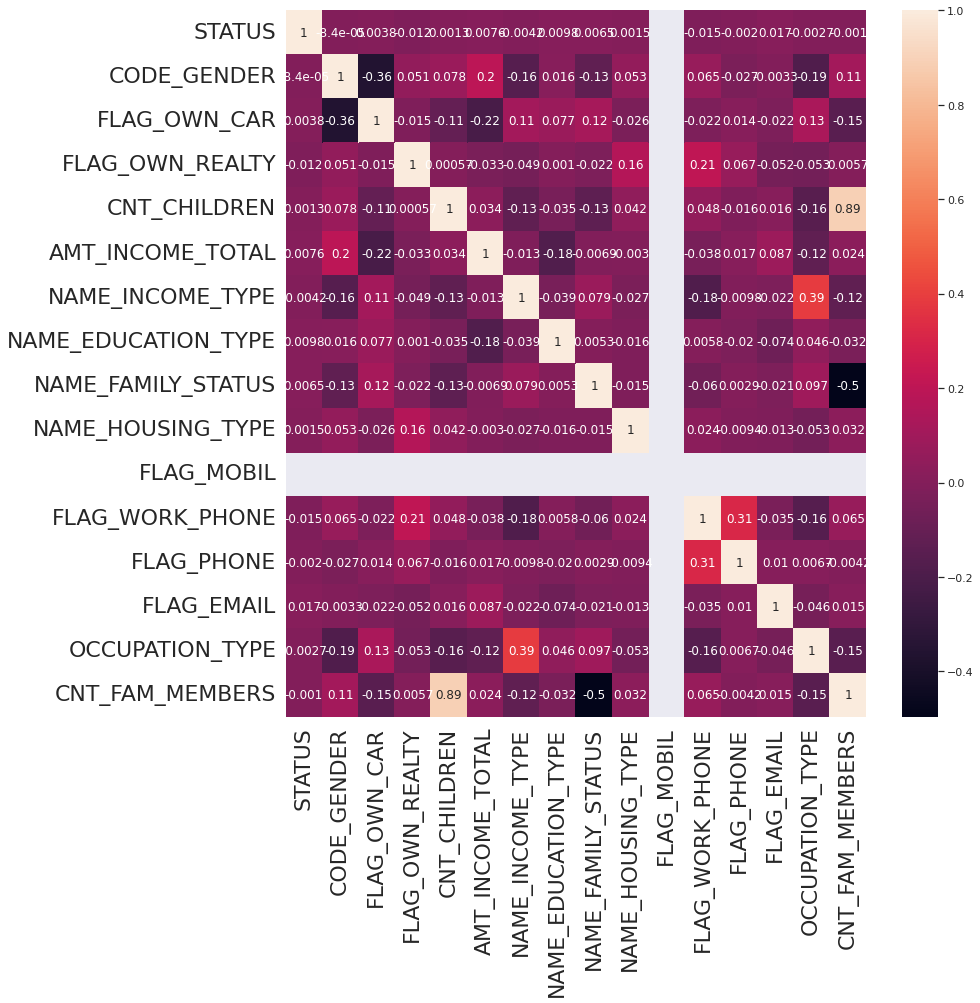

In [ ]:
fig, ax = plt.subplots(figsize=(13, 13))
sns.set(font_scale=1)
sns.heatmap(corr_merge_record.corr(), annot=True)


#### Variables con mayor correlación

- FLAG_OWN_CAR
- CNT_CHILDREN
- AMT_INCOME_TOTAL
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS
- NAME_HOUSING_TYPE
- FLAG_EMAIL


In [ ]:
listadoMenorCorrelacion = ["CODE_GENDER", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE",
                           "FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "OCCUPATION_TYPE", "CNT_FAM_MEMBERS"]


### Descripción de información


Respecto a la correlación ha trabajado, es posible concluir que solo existe una correlación positiva pero muy leve, ya que las variables que se indicaron son positivas, pero con un valor muy cercano a cercano.
Por lo tanto el grado de variación conjunta entre las variable es bajo.


In [ ]:
corr_merge_record.head()


,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,1,0,0,0,427500.0,0,0,0,0,1,1,0,0,19,2
1,0,1,0,0,0,427500.0,0,0,0,0,1,1,0,0,19,2
2,0,1,0,0,0,112500.0,0,1,1,1,1,0,0,0,0,2
3,1,0,1,0,0,270000.0,1,1,2,1,1,0,1,1,1,1
4,0,0,1,0,0,270000.0,1,1,2,1,1,0,1,1,1,1


In [ ]:

corr_merge_record_summary = merge_record.copy()
corr_merge_record_summary.drop(listadoMenorCorrelacion, axis=1, inplace=True)
corr_merge_record_summary.drop(
    ["ID", "DAYS_BIRTH", "DAYS_EMPLOYED", "MONTHS_BALANCE"], axis=1, inplace=True)
corr_merge_record_summary["FLAG_EMAIL"] = np.where(
    corr_merge_record_summary["FLAG_EMAIL"] == 0, "Y", "N")
corr_merge_record_summary.head()


,STATUS,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_EMAIL
0,0,Y,0,427500.0,Higher education,Civil marriage,Rented apartment,Y
1,0,Y,0,427500.0,Higher education,Civil marriage,Rented apartment,Y
2,0,Y,0,112500.0,Secondary / secondary special,Married,House / apartment,Y
3,1,N,0,270000.0,Secondary / secondary special,Single / not married,House / apartment,N
4,0,N,0,270000.0,Secondary / secondary special,Single / not married,House / apartment,N


In [ ]:
# variablesCategoricas = ["STATUS", "FLAG_OWN_CAR", "NAME_EDUCATION_TYPE",
#                         "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "FLAG_EMAIL"]
# pd.set_option('display.max_row', None)
# pd.set_option('display.max_columns', None)

# corr_merge_record_summary.groupby(
#     variablesCategoricas).describe()

# corr_merge_record_summary["NAME_EDUCATION_TYPE"].describe()



In [ ]:

corr_merge_record_summary_0 = corr_merge_record_summary[corr_merge_record_summary["STATUS"] == 0]
corr_merge_record_summary_1 = corr_merge_record_summary[corr_merge_record_summary["STATUS"] == 1]


In [ ]:
variablesCategoricasToStudy = ["FLAG_OWN_CAR", "NAME_EDUCATION_TYPE",
                               "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "FLAG_EMAIL", "CNT_CHILDREN"	, "AMT_INCOME_TOTAL"]

def getUtilInformation(dfIn, name):
    if (dfIn[name].dtype == "float64" or dfIn[name].dtype == "int64"):
        print(f"{name} - Media:    " + str(dfIn[name].mean()))
        print(f"{name} - Desvación Standar:    " + str(dfIn[name].std()))
        print(f"{name} - Moda:    " + str(dfIn[name].mode()))
        print(f"{name} - Mediana: " + str(dfIn[name].median()))
    else:
        print(f"{name} informacion:")
        print(dfIn[name].describe())


##### Resumen de variables con aprobación a poseer una tarjeta de crédito


In [ ]:
for nameCategory in variablesCategoricasToStudy:
    getUtilInformation(corr_merge_record_summary_0, nameCategory)
    print("****************************************************************")


FLAG_OWN_CAR informacion:
count     27619
unique        2
top           N
freq      17103
Name: FLAG_OWN_CAR, dtype: object
****************************************************************
NAME_EDUCATION_TYPE informacion:
count                             27619
unique                                5
top       Secondary / secondary special
freq                              18640
Name: NAME_EDUCATION_TYPE, dtype: object
****************************************************************
NAME_FAMILY_STATUS informacion:
count       27619
unique          5
top       Married
freq        18988
Name: NAME_FAMILY_STATUS, dtype: object
****************************************************************
NAME_HOUSING_TYPE informacion:
count                 27619
unique                    6
top       House / apartment
freq                  24660
Name: NAME_HOUSING_TYPE, dtype: object
****************************************************************
FLAG_EMAIL informacion:
count     27619
unique        2


In [ ]:
def generarGraficoConDesviacionEstandar(dataIn, name):
    fig, ax = plt.subplots()
    stdLineVertical = dataIn[name].std()
    plt.axvline(x=stdLineVertical, linewidth=3, label='Desviación Estándar', color='red')
    plt.legend(loc = 'upper right')

    dataAMT_INCOME_TOTAL = dataIn.groupby(
        [name]).size().reset_index(name="COUNT")
    dataAMT_INCOME_TOTAL_CountValues = dataAMT_INCOME_TOTAL["COUNT"].values
    dataAMT_INCOME_TOTAL_AmtIncomeTotalValues = dataAMT_INCOME_TOTAL[name].values
    ax.scatter(dataAMT_INCOME_TOTAL_AmtIncomeTotalValues,
            dataAMT_INCOME_TOTAL_CountValues)
    plt.show()

##### Desviación Estándar

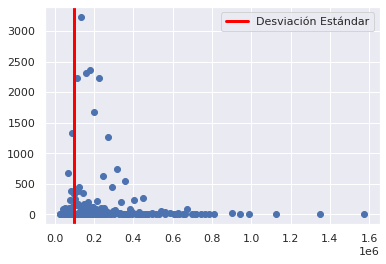

In [ ]:
generarGraficoConDesviacionEstandar(
    corr_merge_record_summary_0, "AMT_INCOME_TOTAL")


##### Conclusiones
1. Es posible apreciar que la mayor cantidad de personas que se les ha aprobado la tarjeta de crédito no poseen un vehículo personal. Junto a esto es posible verificar que el nivel educacional de las personas que se les aprobó la tarjeta fue: "Secondary / secondary special". Además que estaban casadas y poseían una casa o departamento propio.
2. Para el caso de la cantidad de hijos, la media ya la desviación estandar no nos estregan una correcta información, esto se debe a que logicamente no es posible tener un 0.5 hijos. Pero, si es posible comprobar que la mayor cantidad de personas que les otorgo una tarjeta de crédito no poseen hijos.
3. Para el caso de la desviación estandar relacionado al sueldo, se puede ver si que si existe una cercanía de los datos a esta, pero también existe una tendecia a alejarse de esta. Indicando que los datos, si tiene una tendencia a estar dispersos

##### Resumen de variables con rechazo a poseer una tarjeta de crédito


In [ ]:
for nameCategory in variablesCategoricasToStudy:
    getUtilInformation(corr_merge_record_summary_1, nameCategory)
    print("****************************************************************")


FLAG_OWN_CAR informacion:
count     8838
unique       2
top          N
freq      5511
Name: FLAG_OWN_CAR, dtype: object
****************************************************************
NAME_EDUCATION_TYPE informacion:
count                              8838
unique                                5
top       Secondary / secondary special
freq                               6137
Name: NAME_EDUCATION_TYPE, dtype: object
****************************************************************
NAME_FAMILY_STATUS informacion:
count        8838
unique          5
top       Married
freq         6060
Name: NAME_FAMILY_STATUS, dtype: object
****************************************************************
NAME_HOUSING_TYPE informacion:
count                  8838
unique                    6
top       House / apartment
freq                   7888
Name: NAME_HOUSING_TYPE, dtype: object
****************************************************************
FLAG_EMAIL informacion:
count     8838
unique       2
top   

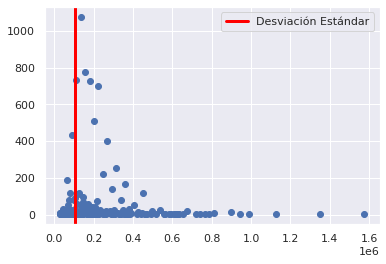

In [ ]:
generarGraficoConDesviacionEstandar(corr_merge_record_summary_1, "AMT_INCOME_TOTAL")

##### Conclusiones
1. Es posible apreciar que el comportamiento para para todas las variables tienen el mismo comportamiento pero en cantidad de diferentes, tanto para personas que se les aprobó o no la tarjeta

### 2 - ¿Cuál es el porcentaje de saldos de tarjetas de crédito en mora en comparación con la cantidad total de crédito pendiente (credit card charge-off rate)?


In [ ]:
print("Numero de clientes en el record de trajetas de credito: {}".format(
    len(pd_credit_record_initial.ID.unique())))
# para verificar si tenemos alguna data perdida
pd_credit_record_charge_off_rate = pd_credit_record_initial.copy()
pd_credit_record_drop = pd_credit_record_charge_off_rate.dropna()
if pd_credit_record_charge_off_rate.shape == pd_credit_record_drop.shape:
    print("No hay data perdida.")
else:
    print("Tenemos {} filas  con data perdida".format(len(
        pd_credit_record_charge_off_rate.ID.unique())-len(pd_credit_record_drop.ID.unique())))


Numero de clientes en el record de trajetas de credito: 45985
No hay data perdida.


In [ ]:
# Agrupnado por ID`s
pd_credit_record_charge_off_rate.sort_values('ID')

# Verificando duplicados
groups_month = pd_credit_record_charge_off_rate.groupby(
    ['ID', 'MONTHS_BALANCE'])
groups_month_count = groups_month.count()
groups_month_count = groups_month_count.rename(columns={"STATUS": "COUNT"})
if groups_month_count.loc[groups_month_count['COUNT'] > 1].empty:
    print("There is no duplicates")
else:
    print("There are duplicates")


There is no duplicates


In [ ]:
# reshape data by 'ID' based on 'MONTHS_BALANCE'
credit_pivot = pd_credit_record_charge_off_rate.pivot(
    index='ID', columns='MONTHS_BALANCE', values='STATUS')
print(credit_pivot.head())


MONTHS_BALANCE  -60  -59  -58  -57  -56  -55  -54  -53  -52  -51  ...  -9   \
ID                                                                ...        
5001711         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
5001712         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    0   
5001713         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    X   
5001714         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    X   
5001715         NaN    X    X    X    X    X    X    X    X    X  ...    X   

MONTHS_BALANCE  -8   -7   -6   -5   -4  -3  -2  -1   0   
ID                                                       
5001711         NaN  NaN  NaN  NaN  NaN   0   0   0   X  
5001712           C    C    C    C    C   C   C   C   C  
5001713           X    X    X    X    X   X   X   X   X  
5001714           X    X    X    X    X   X   X   X   X  
5001715           X    X    X    X    X   X   X   X   X  

[5 rows x 61 columns]


In [ ]:
# Asumimos que el ultimo mes esta abierto para realizar pago
# Asumimos que el primer mes esta cerrado para realizar pago
# group pd_credit_record_charge_off_rate  por 'ID' e identificamos el ultimo y el primer mes.
credit_grouped = pd_credit_record_charge_off_rate.groupby('ID')
credit_pivot['open_month'] = credit_grouped['MONTHS_BALANCE'].min()
credit_pivot['close_month'] = credit_grouped['MONTHS_BALANCE'].max()
credit_pivot['ID'] = credit_pivot.index
credit_pivot = credit_pivot[['ID', 'open_month', 'close_month']]
credit_pivot.reset_index(drop=True, inplace=True)
credit_pivot["window_month"] = credit_pivot['close_month'] - \
    credit_pivot['open_month']
# merge ambos df
credit = pd.merge(pd_credit_record_charge_off_rate,
                  credit_pivot, how='left', on='ID')
# Meses en el balance
credit['MOB'] = credit['MONTHS_BALANCE']-credit['open_month']
credit.sort_values(['ID', 'MOB'], inplace=True)

# Divido por 48 para llevarlo a 4 years
bins = [k for k in range(-61, 1, 12)]
credit['open_year'] = pd.cut(
    credit['open_month'], bins, labels=[-5, -4, -3, -2, -1])  # open_year_to_today

credit0 = credit
credit0.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,ID,MONTHS_BALANCE,STATUS,open_month,close_month,window_month,MOB,open_year
3,5001711,-3,0,-3,0,3,0,-1
2,5001711,-2,0,-3,0,3,1,-1
1,5001711,-1,0,-3,0,3,2,-1
0,5001711,0,X,-3,0,3,3,-1
22,5001712,-18,0,-18,0,18,0,-2


In [ ]:
# Contamos ID unicos
de = credit.groupby('open_year').agg({'ID': pd.Series.nunique})
de = de.rename(columns={"ID": "open_sum"})
de.reset_index(inplace=True)
print(de.head())


  open_year  open_sum
0        -5      5809
1        -4      8045
2        -3      9258
3        -2     11048
4        -1     11455


In [ ]:
# Calculamos la tasa acumulativa de duada para malos clientes (cumulative charge-off rate/cumulative loss rate)

# un cliente sera considerado como "malo" 'bad' (1) si debe mas de  (>60 dias)
credit['overdue'] = np.where((credit['STATUS'] == '2') | (credit['STATUS'] == '3')
                             | (credit['STATUS'] == '4') | (credit['STATUS'] == '5'), 1, 0)
credit


,ID,MONTHS_BALANCE,STATUS,open_month,close_month,window_month,MOB,open_year,overdue
3,5001711,-3,0,-3,0,3,0,-1,0
2,5001711,-2,0,-3,0,3,1,-1,0
1,5001711,-1,0,-3,0,3,2,-1,0
0,5001711,0,X,-3,0,3,3,-1,0
22,5001712,-18,0,-18,0,18,0,-2,0
...,...,...,...,...,...,...,...,...,...
1048549,5150487,-4,C,-29,0,29,25,-3,0
1048548,5150487,-3,C,-29,0,29,26,-3,0
1048547,5150487,-2,C,-29,0,29,27,-3,0
1048546,5150487,-1,C,-29,0,29,28,-3,0


In [ ]:
# Ventana de observación
credit_wm12 = credit[credit['window_month'] > 12]
print(credit.head())


         ID  MONTHS_BALANCE STATUS  open_month  close_month  window_month  \
3   5001711              -3      0          -3            0             3   
2   5001711              -2      0          -3            0             3   
1   5001711              -1      0          -3            0             3   
0   5001711               0      X          -3            0             3   
22  5001712             -18      0         -18            0            18   

    MOB open_year  overdue  
3     0        -1        0  
2     1        -1        0  
1     2        -1        0  
0     3        -1        0  
22    0        -2        0  


In [ ]:
vintage = credit_wm12.groupby(['open_year', 'MOB']).agg({
    'ID': pd.Series.nunique})
vintage.reset_index(inplace=True)
vintage['overdue_count'] = np.nan
vintage = vintage[['open_year', 'MOB', 'overdue_count']]
vintage = pd.merge(vintage, de, how='left', on='open_year')


In [ ]:
# loop para contar deudas
for i in range(-5, -1):
    ls = []
    for j in range(0, 61):
        # Guardando ID`s
        due = list(credit[(credit.open_year == i) & (
            credit.MOB == j) & (credit.overdue == 1)]['ID'])
        ls.extend(due)
        vintage.loc[(vintage.open_year == i) & (
            vintage.MOB == j), 'overdue_count'] = len(set(ls))


In [ ]:
# Para los clientes que tienen abiertas sus tarjetas de crédito hace menos de 1 año
vintage['rate'] = vintage['overdue_count']/vintage['open_sum']
# no es posible que tengan un tiempo de ventana de observación de más de 12 meses
vintage = vintage[vintage['open_year'] < -1]
vintage_tb = vintage.pivot(index='open_year', columns='MOB', values='rate')
vintage_tb


MOB,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
open_year,,,,,,,,,,,,,,,,,,,,,
-5,0.000000,0.000516,0.002410,0.003787,0.006025,0.007230,0.008952,0.011706,0.012050,0.014288,...,0.027716,0.027716,0.027716,0.027888,0.028060,0.028060,0.028060,0.028232,0.028232,0.028232
-4,0.000124,0.000497,0.001119,0.002237,0.004475,0.005345,0.006961,0.008950,0.009695,0.011063,...,0.021504,0.021504,0.021504,0.021504,0.021504,0.021504,0.021504,0.021504,0.021504,0.021504
-3,0.000000,0.000000,0.000648,0.001512,0.002268,0.003672,0.004105,0.005941,0.006913,0.007777,...,0.014150,0.014150,0.014150,0.014150,0.014150,0.014150,0.014150,0.014150,0.014150,0.014150
-2,0.000000,0.000000,0.000724,0.002172,0.002896,0.003983,0.004707,0.005702,0.006608,0.006970,...,0.010771,0.010771,0.010771,0.010771,0.010771,0.010771,0.010771,0.010771,0.010771,0.010771


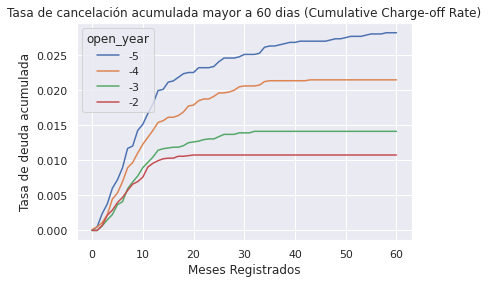

In [ ]:
# ploteando
plt.rcParams['figure.facecolor'] = 'white'
vintage_graph = vintage_tb.replace(0, np.nan)
lst = [i for i in range(0, 61)]
vintage_tb[lst].T.plot(legend=True, grid=True,
                       title="Tasa de cancelación acumulada mayor a 60 dias (Cumulative Charge-off Rate)")
plt.xlabel("Meses Registrados")
plt.ylabel('Tasa de deuda acumulada')
plt.show()


Como se observa en el grafico la tasa de cancelación de tarjetas se redujo progresivamente lo cual indica que el banco ejecuto alguna medida para disminuir el nivel deuda en su portafolio de clientes. Entendiendo que una tarjeta de crédito se cancela cuando entra en incumplimiento del pago mensual por un periodo mayor a 60 días.
